# Ricky's Final Project - Part 3

### Pokedex Upgrade - Predicting Catch Rates and Legendary Status of Unknown Pokemon

**Data Set Details**

The data set includes 21 variables for each of the 721 Pokemon.

**Data Dictionary**

* Number = Pokémon ID in the Pokédex (integer)
* Name = Name of the Pokémon (string)
* Type_1 = Primary type (string)
* Type_2 = Second type, in case the Pokémon has it (string)
* Total = Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed) (integer)
* HP = Base Health Points (integer)
* Attack = Base Attack (integer)
* Defense = Base Defense (integer)
* Sp_Atk = Base Special Attack (integer)
* Sp_Def = Base Special Defense (integer)
* Speed = Base Speed (integer)
* Generation = Number of the generation when the Pokémon was introduced (integer)
* isLegendary = Indicates whether the Pokémon is Legendary or not (boolean)
* Color = Color of the Pokémon according to the Pokédex (string)
* hasGender = Indicates if the Pokémon can be classified as female or male (boolean)
* Pr_male = In case the Pokémon has Gender, the probability of its being male (float)
* Egg_Group_1 = Egg Group of the Pokémon (string)
* Egg_Group_2 = Second Egg Group of the Pokémon, in case it has two (string)
* hasMegaEvolution = Indicates whether the Pokémon is able to Mega-evolve or not (boolean)
* Height_m = Height of the Pokémon, in meters (float)
* Weight_kg = Weight of the Pokémon, in kilograms (float)
* Catch_Rate = Catch Rate (integer)
* Body_Style = Body Style of the Pokémon according to the Pokédex (string)


In [328]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

plt.style.use('ggplot')

In [329]:
poke_data = pd.read_csv(os.path.join('.', 'pokemon_stats_data.csv'), index_col = 0)

"""I chose to drop a few variables because they were either not useful or redundant such as 'Name' which is substituted with just
their registration number."""

del poke_data['Egg_Group_2']
del poke_data['Generation']
del poke_data['Name']
poke_data.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
2,Grass,Poison,405,60,62,63,80,80,60,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
3,Grass,Poison,525,80,82,83,100,100,80,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
4,Fire,NaN,309,39,52,43,60,50,65,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
5,Fire,NaN,405,58,64,58,80,65,80,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [330]:
# Identifying my data types
poke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 1 to 721
Data columns (total 19 columns):
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-null object
dtypes: bool(3), float64(3), int64(8), object(5)
memory usage: 97.9+ KB


In [331]:
# Examining the distribution of the data set
poke_data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,0.553377,1.144979,56.773370,100.246879
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,0.199969,1.044369,89.095667,76.573513
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.100000,0.100000,3.000000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,NaN,0.610000,9.400000,45.000000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,NaN,0.990000,28.000000,65.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,NaN,1.400000,61.000000,180.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,1.000000,14.500000,950.000000,255.000000


In [332]:
# Replacing any NA values to avoid future errors.
poke_data['Pr_Male'].replace('NaN', float(0.00)).value_counts()

0.500    458
0.875    101
0.000    100
0.250     22
1.000     19
0.750     19
0.125      2
Name: Pr_Male, dtype: int64

In [333]:
# Transforming boolean (T/F) columns to binary using one hot coding. And removing the prvious column features.

poke_data = pd.concat([poke_data, (pd.get_dummies(poke_data['hasGender'], prefix='Gender', drop_first=True))], axis=1)
poke_data = pd.concat([poke_data, (pd.get_dummies(poke_data['isLegendary'], prefix='Legendary', drop_first=True))], axis=1)
poke_data = pd.concat([poke_data, (pd.get_dummies(poke_data['hasMegaEvolution'], prefix='hasMegaEvolution', drop_first=True))], axis=1)

del poke_data['hasGender']
del poke_data['isLegendary']
del poke_data['hasMegaEvolution']

poke_data.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Pr_Male,Egg_Group_1,Height_m,Weight_kg,Catch_Rate,Body_Style,Gender_True,Legendary_True,hasMegaEvolution_True
Number,,,,,,,,,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,Green,0.875,Monster,0.71,6.9,45,quadruped,1.0,0.0,0.0
2,Grass,Poison,405,60,62,63,80,80,60,Green,0.875,Monster,0.99,13.0,45,quadruped,1.0,0.0,0.0
3,Grass,Poison,525,80,82,83,100,100,80,Green,0.875,Monster,2.01,100.0,45,quadruped,1.0,0.0,1.0
4,Fire,NaN,309,39,52,43,60,50,65,Red,0.875,Monster,0.61,8.5,45,bipedal_tailed,1.0,0.0,0.0
5,Fire,NaN,405,58,64,58,80,65,80,Red,0.875,Monster,1.09,19.0,45,bipedal_tailed,1.0,0.0,0.0


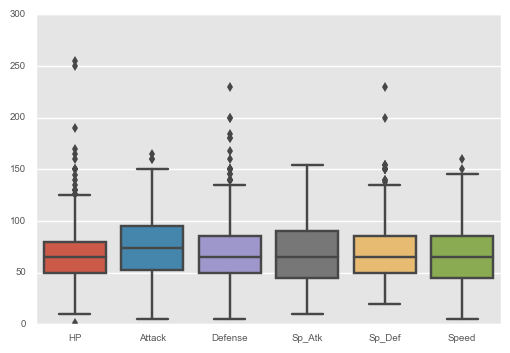

In [336]:
# Exploring individual battle stats using boxplots to examine for any outliers
battle_stats = poke_data[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]
sns.boxplot(data=battle_stats);

There appears to be some outliers in the HP, Defense and Sp_Def features. It could be possible that these may be indicators of a legendary pokemon status. 

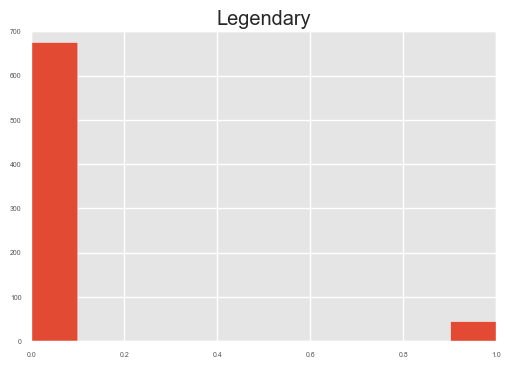

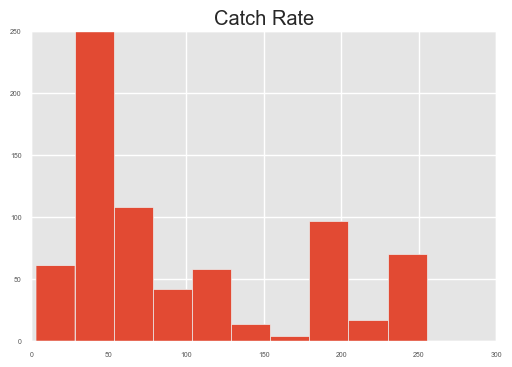

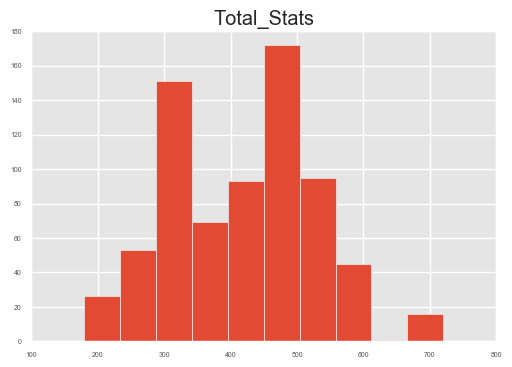

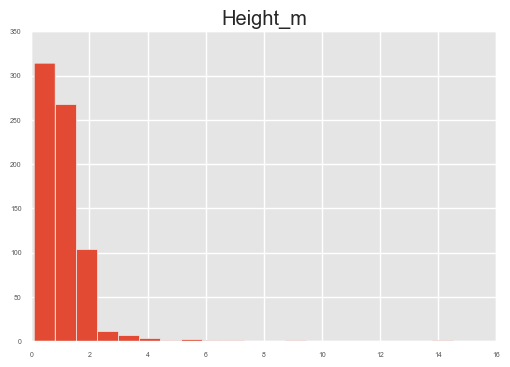

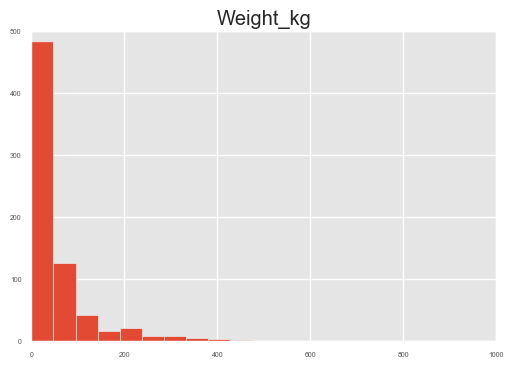

In [308]:
#Dependent Var 1
plt.figure(1)
plt.hist(poke_data['Legendary_True'])
plt.title('Legendary');

#Dependent Var 2 
plt.figure(2)
plt.hist(poke_data['Catch_Rate'])
plt.title('Catch Rate');

plt.figure(3)
plt.hist(poke_data['Total'])
plt.title('Total_Stats');

plt.figure(4)
plt.hist(poke_data['Height_m'], bins=20)
plt.title('Height_m');

plt.figure(5)
plt.hist(poke_data['Weight_kg'], bins=20)
plt.title('Weight_kg');

Running histograms on the Lengendary_True and Catch_Rate dependent features gave me a solid read out of my modeling approaches for the two and potential concerns. Lengenday_True is now a binary boolean feature for which we could run a logistic regression on. An area of concern is the low number of pokemon that are classified as Legendary. I might run into an over fitting situation. 

Catch rate has a bimodal distribution and it would seem that a linear regression could work as a modeling method. 

Total stats is a closely stacked bimodel distribution. There is a small pocket of Pokemon that have a total strength of 700 which may be a strong indicator of legendary status and difficulty catching. 

In [337]:
# Examining the average Total strength of legendary vs non legendary. Verifying that legendary pokemon have higher total stats.
legend_breakout = poke_data.groupby(poke_data['Legendary_True'], sort=True)['Total'].mean()
print legend_breakout

Legendary_True
0.0    404.161481
1.0    620.217391
Name: Total, dtype: float64


In [310]:
poke_data.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate,Gender_True,Legendary_True,hasMegaEvolution_True
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.113564,0.526813,0.535966,-0.738280,-0.385978,0.481837,0.228503
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,-0.066704,0.442872,0.431320,-0.478725,-0.155031,0.258926,0.093708
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.213882,0.408590,0.469395,-0.525106,-0.196892,0.302786,0.203840
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.063899,0.354205,0.476983,-0.436558,-0.269466,0.274446,0.122666
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.105893,0.330579,0.285048,-0.539114,-0.336579,0.409739,0.175581
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.017941,0.313196,0.328645,-0.513014,-0.337265,0.360215,0.149796
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.070098,0.224617,0.108637,-0.410557,-0.216964,0.286082,0.147844
Pr_Male,0.113564,-0.066704,0.213882,0.063899,0.105893,0.017941,0.070098,1.000000,0.040863,0.061196,-0.253645,NaN,0.095428,0.031731
Height_m,0.526813,0.442872,0.408590,0.354205,0.330579,0.313196,0.224617,0.040863,1.000000,0.661342,-0.382862,-0.200026,0.326323,0.194621
Weight_kg,0.535966,0.431320,0.469395,0.476983,0.285048,0.328645,0.108637,0.061196,0.661342,1.000000,-0.367798,-0.361465,0.425219,0.129057


There is a higher positive correlation between 'Total' than each of the respective battle stats. This makes sense since Total is the sum of all stats. At first I thought it would be intuitive to drop 'Total' but it looks like Total shares a higher correlation with a pokemon's Legendary classification. Therefore, it may be good to leave it in the dataframe as a potential feature for my model as a way to reduce the number of features included. Additionally, "Total" has a high negative correlation with "Catch Rate" which makes sense since higher battle stats would equate to a tougher time catching a pokemon. This may be another reason to keep it as it could be a strong predictor. 

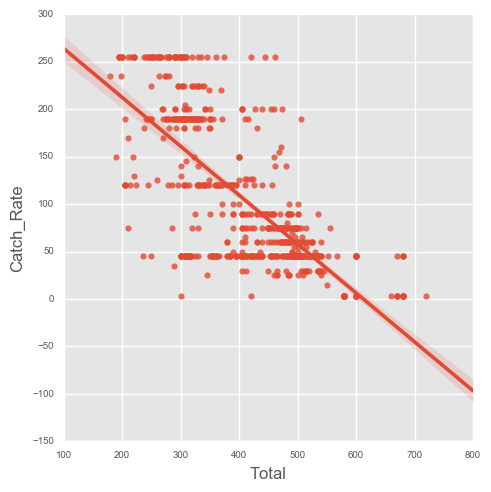

In [338]:
#Further examining the relationship between Total and Catch_Rate
sns.lmplot(x='Total', y='Catch_Rate', data=poke_data)

In [312]:
#Exploring body_style vs legendary status
legend_breakout = pd.DataFrame(data=poke_data.groupby(poke_data['Body_Style'], sort=True)['Legendary_True'].value_counts())
print legend_breakout

                                 Legendary_True
Body_Style       Legendary_True                
bipedal_tailed   0.0                        150
                 1.0                          8
bipedal_tailless 0.0                        101
                 1.0                          8
four_wings       0.0                         18
head_arms        0.0                         35
                 1.0                          4
head_base        0.0                         30
head_legs        0.0                         17
head_only        0.0                         33
                 1.0                          1
insectoid        0.0                         30
multiple_bodies  0.0                         15
quadruped        0.0                        123
                 1.0                         12
serpentine_body  0.0                         26
                 1.0                          3
several_limbs    0.0                         13
two_wings        0.0                    

This shows that some styles have had zero legendary status historically such as head base, head legs insectoids, quadruped, several limbs, bipedal tailed or four wings. This could be potentially helpful going forward.

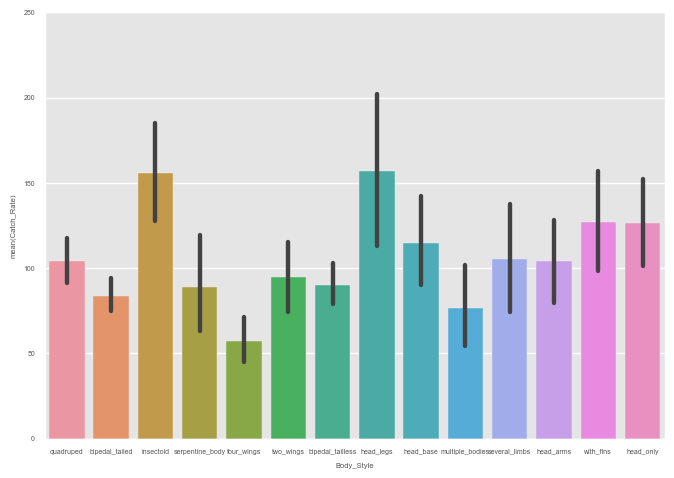

In [339]:
#Pardon the tiny font, the body type names are incredible large
sns.set_context("notebook", font_scale=.50)
sns.barplot(x='Body_Style', y='Catch_Rate', data=poke_data);

We can further see that catch rates vary but remain in a 25 point range with the exception of a few body types such as insectoids and head_legs which are easier to catch. This tells me I will need additional features to help further accuracy.

In [340]:
#Exploring Type vs legendary status
legend_breakout = pd.DataFrame(data=poke_data.groupby(poke_data['Type_1'], sort=True)['Legendary_True'].value_counts())
print legend_breakout

                         Legendary_True
Type_1   Legendary_True                
Bug      0.0                         63
Dark     0.0                         26
         1.0                          2
Dragon   0.0                         17
         1.0                          7
Electric 0.0                         33
         1.0                          3
Fairy    0.0                         16
         1.0                          1
Fighting 0.0                         25
Fire     0.0                         42
         1.0                          5
Flying   0.0                          2
         1.0                          1
Ghost    0.0                         22
         1.0                          1
Grass    0.0                         64
         1.0                          2
Ground   0.0                         28
         1.0                          2
Ice      0.0                         21
         1.0                          2
Normal   0.0                         91


Looking at the comparision of legendary vs non legendary by Type, most types have a classified legendary type. However, Psychic and Dragon types seem to have a higher occurances. 

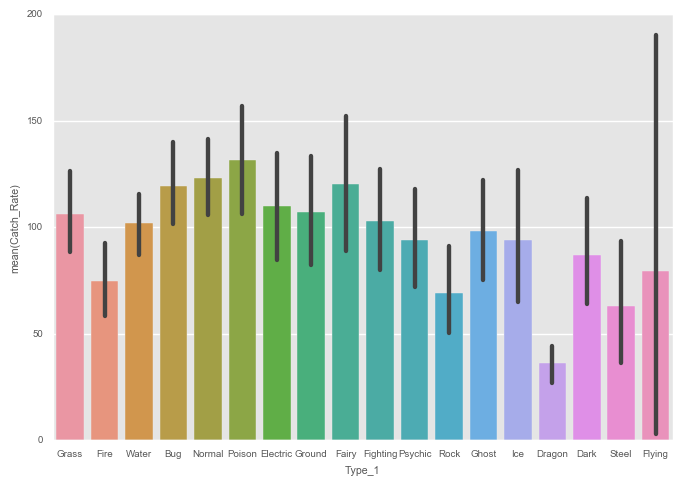

In [341]:
#Looking at Type vs Catch Rates
sns.set_context("notebook", font_scale=.7)
sns.barplot(x='Type_1', y='Catch_Rate', data=poke_data);

The Catch Rate means seem to vary a bit by pokemon type. However, some types appear to be more prone to much wider standard deviation (such as the Flying type) which could be dangerous in regards to using this field as a predictor for catch rates.